# TensorFlow4- Building Sample Neural Network

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
#let number of columns or no. of features or x be equal to 10
n_features=10

In [3]:
#let number of neurons in a layer be 3
n_neurons=3

In [4]:
#creating a placeholder for x
#having any number of rows and 10 columns
#this is because we will be training our model in a batch
x=tf.placeholder(tf.float32,(None,n_features))

In [7]:
# weight matrix will be multiplied with x so shape should be 
#.... no. of feauturesX no. of neurons
# result of x*w will be matrix of [no. of rowsX no. of neurons]
w=tf.Variable(tf.random_normal([n_features,n_neurons]))

#bias will be equal to [number of neuronsX1]. It will hold value 1
b=tf.Variable(tf.ones([n_neurons]))


In [8]:
xw=tf.matmul(x,w)

In [9]:
z=tf.add(xw,b)

you can use tf.nn.relu or tf.tanh

In [10]:
act=tf.sigmoid(z)

Now before running initiaize your variables

In [12]:
init=tf.global_variables_initializer()

In [14]:
# will pass activation function in output layer
# layer_out will have 1 X no. of features

with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(act,feed_dict={x:np.random.random([1,n_features])})
    

In [15]:
# all the values are between 0 and 1 due to sigmoid function
print(layer_out)

[[0.9873653  0.08154406 0.5818412 ]]


we have run our program once. Now we will go back and adjust our weights and bias in Cost function

# Simple Regression Example

In [17]:
x_data= np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label= np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [21]:
import matplotlib.pyplot as plt

In [18]:
x_data

array([ 0.90807757,  0.89685837,  1.85168566,  3.85867567,  4.04997515,
        5.16978215,  8.01437058,  7.22157695,  9.26723901, 10.94535118])

In [20]:
y_label

array([-0.37058303,  0.3448234 ,  3.19355264,  4.66117517,  5.65223827,
        4.72431224,  6.48280533,  7.74690484,  7.4190846 ,  9.56639005])

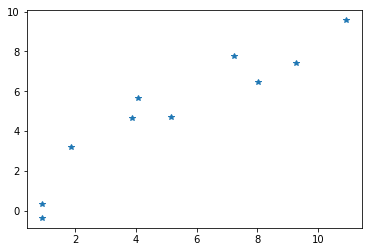

In [24]:
plt.plot(x_data,y_label,'*')

y=mx+c

In [25]:
np.random.rand(2)

array([0.2249352 , 0.42373029])

In [27]:
# we are initializing variables 
m=tf.Variable(0.22)
b=tf.Variable(0.42)

In [30]:
#initially error is zero
error=0

#evaluating error so that optimizer can reduce this error
#zip will create some kind of tuples
for x,y in zip(x_data,y_label):
    yhat=m*x+b
    error +=(y-yhat)**2

In [33]:
#defining gradient descent optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [35]:
train=optimizer.minimize(error)

In [36]:
init=tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    #training step is how many times we will run optimizer
    training_step=1
    for i in range(training_step):
        #we will pass optimizer here
        sess.run(train)
    #fetching my result back and grab m,b from session
    final_slope,final_intercept=sess.run([m,b])

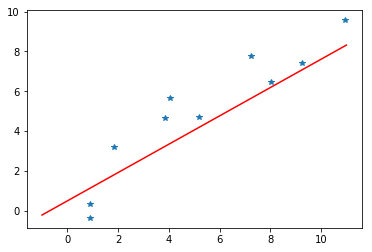

In [46]:
x_test=np.linspace(-1,11,10)
#y=mx+B
y_pred_plot=final_slope*x_test+final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [ ]:
#change training step from 1 to 10000